# 트리( Tree )
: Cycle이 없는 그래프 

    그래프 G는 트리이다.
    = G는 Cycle이 없는 Connected Graph이다.
    = G는 Cycle이 없는 그래프 형태를 유지하지만, 간선을 추가할 경우 Cycle이 생성된다.
    = G는 Connected Graph이고, 어떤 간선을 제거해도 Connected Graph가 아니게 된다.
    = G는 Connected Graph이고, 간선의 수는 정점의 수보다 하나 작다. 

<br>

# 신장 트리( Spanning Tree )
: 주어진 그래프 G가 하나의 연결성분으로 구성되어 있을 때, G의 모든 정점들을 포함화되 트리가 되는 부분 연결그래프 
- 정점 N개인 그래프의 신장트리는 N-1개의 간선을 가짐
- G = (V, E)가 주어졌을 때, **사이클이 존재하지 않고** **V' = V**이고 **E' ⊂ E**인 신장 트리 G' = (V', E')

<br>

# 최소 신장 트리( MST : Minimum Spanning Tree )
: 하나의 연결성분으로 이루어진 **무방향 가중치 그래프**에서 간선들의 **가중치 합이 최소**인 부분그래프
- **간선들의 가중치 합이 최소인 부분그래프는 무조건 트리임**

  🧐**WHY**❔
  - 만약 트리가 아니라면 반드시 싸이클이 존재함
  - 이때, 싸이클 상의 한 간선을 제거하면 더 작은 가중치 합을 가지는 신장 트리가 생성됨


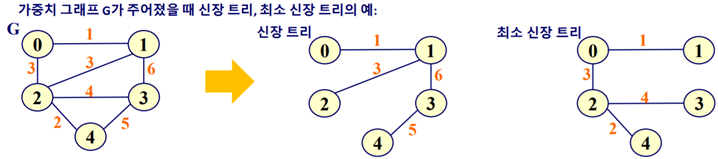

<br>

# **MST** 찾기 : **탐욕적** 알고리즘
- Greedy Choice Property : 앞의 선택이 이후의 선택에 영향을 주지 않음
  - 그 순간 최적이라고 생각되는 것을 부분 해로 선택하는 과정을 반복하면 최종적으로 최적의 해를 찾을 수 있는 특성
- Optimal Sub-structure : 문제에 대한 최적해가 부분문제에 대해서도 최적해임

|         | 최악의 경우 | Sparse Graph | Dense Graph |
|---------|-------------|--------------|-------------|
| Prim    | O(N^2)      | O(N^2)       | O(N^2)      |
| Kruskal | O(N^2logN)  | O(NlogN)     | O(N^2logN)  |

<br>

## 👉 **Prim 알고리즘** : o(N^2)
- 정점의 수 = N
- 정점을 기반으로 동작

: 임의의 시작 정점에서 가장 가까운 정점을 추가하여 간선이 하나인 MST를 만들고, 
만들어진 MST에 인접한 가장 가까운 정점을 하나씩 추가하는 방식을 반복하여 
N-1개의 간선이 생성되었을 때 알고리즘을 종료

1. Selection Procedure : MST에 속하지 않은 정점 중 가중치가 가장 작은 정점 u을 MST에 추가한 후, u와 인접한 정접의 가중치값 갱신
2. Feasibility check : ❌
3. Solution Check : MST와 V가 동일한지 확인


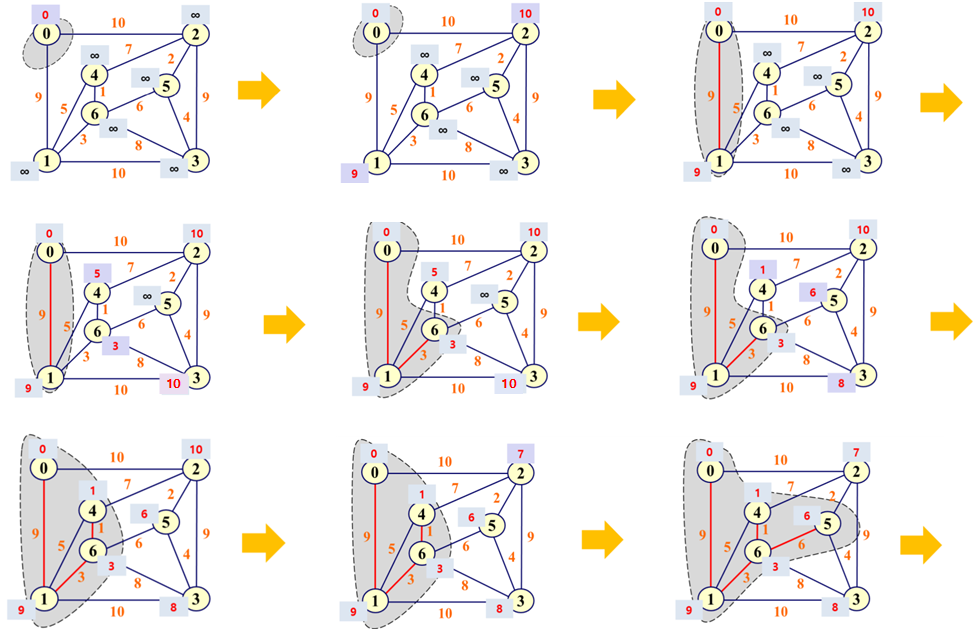

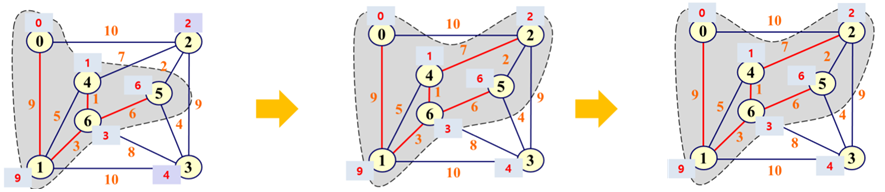

## ✔️ 정확성 검증
- **G = ( V, E )** : 하나의 연결성분으로 이루어진 무방향 가중치 그래프
- **E'** : E의 부분집합
- **Y** : E'에 존재하는 간선들로 연결된 **정점**들의 집합 
- **F** : MST에 속하는 **간선**들의 집합
  - ( V, F ) = Minimum Spanning Tree
- **e** : Y에 속한 정점과 V-Y에 존재하는 정점을 잇는 간선 중 가중치가 가장 작은 **간선**
- **e'** : Y에 속한 정점과 V-Y에 존재하는 정점을 잇는 간선 중 e이 아닌 **간선**

<br>

### **Lemma 1** : E'이 유망하다고 가정하면, E' U {e}는 유망하다.
#### 🧐 Proof 
- E'은 유망하므로, E' ⊆ F

#### 1️⃣ e ∈ F인 경우 

    E' U {e} ⊆ F 이므로, E' U {e}는 유망하다.

#### 2️⃣ e ∉ F인 경우

- ( V, F )는 Mininum Spanning Tree이므로 F U {e}는 반드시 cycle C가 존재하게 되며, e는 반드시 C를 이루는 간선들 중 하나임
- e'∈ F이 C를 이루는 간선들 중에 반드시 하나임
- F U {e}에서 e'를 제거하면 C는 없어지며 다시 Spanning Tree가 됨
- e의 가중치 ≤ e'의 가중치 
- ( V, F U {e} - {e'} )는 Mininum Spanning Tree


    E' U {e} ⊆ F U {e} - {e'} 이므로, E' U {e}는 유망하다.

<br>

### **Definition 1** : E'에 간선을 추가하여 MST가 되면, E'은 유망하다.
### ➡️ **Theorem 1** : E'에 간선이 추가할 때마다 E'이 유망함을 보이면, 최종해가 항상 최적이다.

#### 🧐 Proof ( 귀납법 )
: MST에 반복하여 가중치가 가장 작은 정점을 하나씩 추가하였을 때 생성된 집합 E'가 유망하다는 것을 보임으로써 증명
- **귀납기본(induction base)** 
  
  : E'이 공집합이라면 E'은 유망하다.
- **귀납가정(induction hypothesis)** 
  
  : 특정 반복이 이루어진 후(e.g., m 번 반복 후), 그 때까지 생성되었던 간선의 집합인 E'이 유망하다고 가정한다.
- **귀납단계(induction step)** 
  
  : 특정 반복의 다음 단계 반복 시(e.g., m + 1 번 째 반복 시) 생성될 간선을 e라고 했을 때 E' ∪ {e}가 유망하다는 것을 보이면 되는데, **Lemma 1**에 따라 E' ∪{e}는 유망하다 할 수 있다. 그 이유는 e는 Y에 속한 정점과 V － Y에 존재하는 정점을 잇는 간선 중에서 가중치가 가장 작은 간선이기 때문이다. 

In [7]:
import sys

N = 7
s = 0

graph = {
    'A' : {'B' : 9, 'C' : 10},
    'B' : {'A' : 9, 'D' : 10, 'E' : 5, 'G' : 3},
    'C' : {'A' : 10, 'D' : 9, 'E' : 7, 'F' : 2},
    'D' : {'B' : 10, 'C' : 9, 'F' : 4, 'G' : 8},
    'E' : {'B' : 5, 'C' : 7, 'G' : 1},
    'F' : {'C' : 2, 'D' : 4, 'G' : 6},
    'G' : {'B' : 3, 'D' : 8, 'E' : 1, 'F' : 6},
}

visited = [False for x in range(N)]
dist = [sys.maxsize for x in range(N)]
previous = [None for x in range(N)]
dist[s], previous[s] = 0, 'A'
mst = []

for v in range(N):
  u = -1
  mindist = sys.maxsize
  for i in range(N):
    if not visited[i] and dist[i] < mindist :
      mindist = dist[i]
      u = i
  visited[u] = True
  mst.append([ previous[u], chr(u+65), dist[u]])
  
  for name, wt in graph[chr(u+65)].items():
    w = ord(name) - 65
    if not visited[w]:
      if wt < dist[w]:
        dist[w] = wt
        previous[w] = chr(u+65)

print("Minimum Spanning Tree : ", end = "")
mst_cost = 0
for i in range(1, N):
  print(mst[i], end =' ')
  mst_cost += mst[i][2]
print("\nMinimum Spanning Tree Weight : ", mst_cost)

Minimum Spanning Tree : ['A', 'B', 9] ['B', 'G', 3] ['G', 'E', 1] ['G', 'F', 6] ['F', 'C', 2] ['F', 'D', 4] 
Minimum Spanning Tree Weight :  25


<br>

## 👉 **minheap을 이용한 Prim 알고리즘** 개선: O(ElogV)

In [ ]:
from heapdict import heapdict

def prim(graph, first):
    mst = []
    keys = heapdict()
    previous = dict()   
    total_weight = 0

    #초기화
    for node in graph.keys():
        keys[node] = float('inf')
        previous[node] = None
    keys[first], previous[first] = 0, first

    while keys:
        current_node, current_key = keys.popitem()
        mst.append([previous[current_node], current_node, current_key])
        visited[ord(current_node) - 65] =  True
        total_weight += current_key
        for adjacent, weight in graph[current_node].items():
          if not visited[ord(adjacent) - 65]:
            if adjacent in keys and weight < keys[adjacent]:
                keys[adjacent] = weight
                previous[adjacent] = current_node
    return mst, total_weight

graph = {
    'A' : {'B' : 9, 'C' : 10},
    'B' : {'A' : 9, 'D' : 10, 'E' : 5, 'G' : 3},
    'C' : {'A' : 10, 'D' : 9, 'E' : 7, 'F' : 2},
    'D' : {'B' : 10, 'C' : 9, 'F' : 4, 'G' : 8},
    'E' : {'B' : 5, 'C' : 7, 'G' : 1},
    'F' : {'C' : 2, 'D' : 4, 'G' : 6},
    'G' : {'B' : 3, 'D' : 8, 'E' : 1, 'F' : 6},
}
visited = [False for x in range(len(graph))]

mst, total_weight = prim(graph, 'A')
print(mst)
print(total_weight)

[['A', 'A', 0], ['A', 'B', 9], ['B', 'G', 3], ['G', 'E', 1], ['G', 'F', 6], ['F', 'C', 2], ['F', 'D', 4]]
25


<br>

## 👉 **Kruskal 알고리즘** : o(ElogE)
- 정점의 수 = N
- 간선을 기반으로 동작

: 그래프에 속한 간선들 중 가중치가 가장 작은 간선을 선택 후, 싸이클을 만들지 않으면 MST 간선에 추가하고, 싸이클을 만들면 제외시키는 연산을 반복하여 N-1개의 간선이 MST에 추가되었을 때 알고리즘 종료

1. Selection Procedure : 가중치를 기준으로 오름차순 정렬을 한 간선 리스트 L에서 가중치의 값이 최소인 간선 e를 선정 후 L에서 제거
2. Feasibility check : 만약 e를 추가 시, 싸이클이 생성되지 않는다면 e를 MST에 추가
3. Solution Check : 만약 MST에 추가된 간선의 수가 V-1개면, MST는 최소 신장 트리임

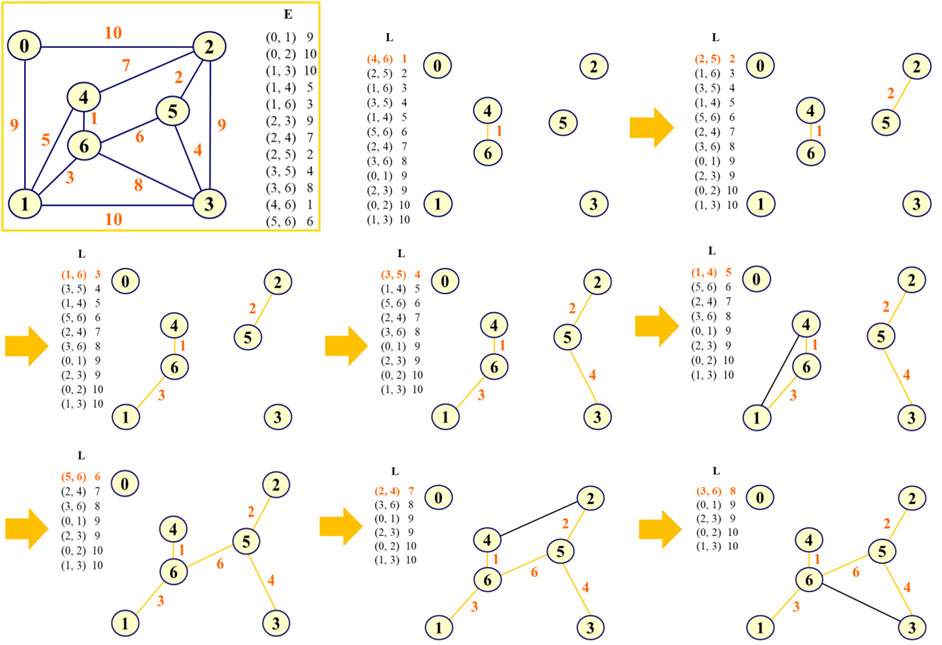

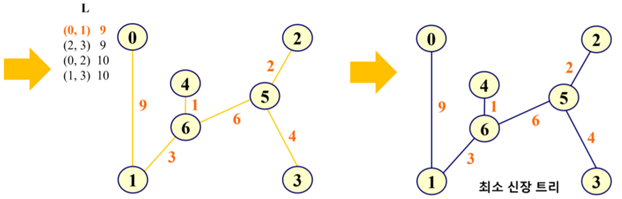

### Disjoint Sets와 Union & Find 연산
: 추가하려는 간선이 싸이클을 생성하는지 확인하는 방법
#### 1️⃣ Disjoint Sets
: 논리적 트리로 구현
#### 2️⃣ Find(u) 연산
: u를 포함하는 집합의 루트 노드를 검색하는 연산
- 최악의 경우 : O(n), 평균의 경우 : O(log n)
- **Path Compression** : find 연산을 수행하면서 루트 노드까지 올라가는 경로 상의 각 노드의 부모를 루트 노드로 갱신하는 것
  - 두번째 호출때부터 O(1) 가능

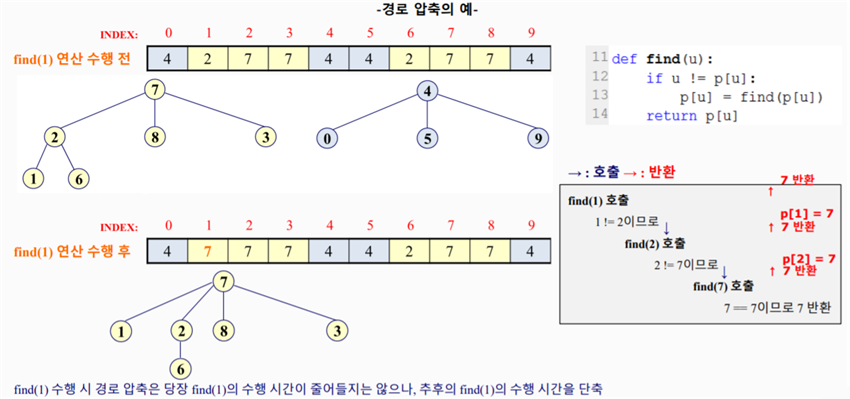

#### 3️⃣ Union 연산
: 서로소 집합을 합치는 연산

In [ ]:
weights = [(0,1,9), (0,2,10), (1,3,10), (1,4,5), (1,6,3), (2,3,9), (2,4,7), (2,5,2), (3,5,4), (3,6,8), (4,6,1), (5,6,6)]
weights.sort(key = lambda t:t[2])

mst = []
N = 7
parent = [i for i in range(N)]

def find(u): 
  if u != parent[u]:
    parent[u] = find(parent[u])
  return parent[u]

def union(u,v):
  root1 = find(u)
  root2 = find(v)
  parent[root2] = root1

tree_edges = 0
mst_cost = 0
while True:
  if tree_edges == N-1 :
    break
  u, v, wt = weights.pop(0)
  if find(u) != find(v):
    union(u,v)
    mst.append((u,v))
    mst_cost += wt
    tree_edges += 1

print("Minimum Spanning Tree :", end="")
print(mst)
print("Minimum Spanning Tree Weights :", mst_cost)

Minimum Spanning Tree :[(4, 6), (2, 5), (1, 6), (3, 5), (5, 6), (0, 1)]
Minimum Spanning Tree Weights : 25


<br>

### 🧐 **Kruskal 알고리즘 분석**

- N : 정점의 사이즈
- M : 간선의 사이즈

**O(MlogM)** : Find 및 Union 연산을 M번 수행하는데 Find 및 Union 연산의 수행시간은 O(logM)임

**O(N)** : 서로소 집합을 초기화하는데 걸리는 시간 

    - G는 그래프 이므로 M ≥ N -1 이므로 수행시간은 O(MlogM)
    - G에서 N-1 ≤ M ≤ N(N-1)/2 임
    - G는 모든 정점이 다른 모든 정점과 연결이 될 때, M = (N-1) + (N-2) + ... + 2 + 1 = N(N-1)/2 임
    - 최악의 경우 시간복잡도는 O(N^2logN^2) = O(2N^2logN) = O(N^2logN)

1️⃣ G = Dense Graph

  : 간선의 수가 최대 간선의 수에 가까우므로 시간 복잡도는 O(N^2logN)

2️⃣ G = Sparse Graph 

  : 간선의 수가 M에 가까우므로 시간 복잡도는 O(NlogN)

<br>

## 👉 **minheap을 이용한 Kruskal 알고리즘** 개선

In [ ]:
import sys
import heapq

input = [(0,1,9), (0,2,10), (1,3,10), (1,4,5), (1,6,3), (2,3,9), (2,4,7), (2,5,2), (3,5,4), (3,6,8), (4,6,1), (5,6,6)]
input.sort(key = lambda t:t[2])

def find(u): 
  if u != parent[u]:
    parent[u] = find(parent[u])
  return parent[u]

def union(parent, a,b):
    a = find(a)
    b = find(b)
    if a < b:
        parent[b] = a
    else:
        parent[a] = b

n = 7
edges = []
result = 0

parent = [i for i in range(n)]
for i in input:
    a,b,cost = i[0], i[1], i[2]
    heapq.heappush(edges,(cost,a,b))

while edges:
    cost,a,b = heapq.heappop(edges)
    if find(a) != find(b):
        union(parent,a,b)
        result += cost

print(result)

25
